In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline
import seaborn as sns

In [2]:
import numpy as np
from skimage import exposure, filters

def extract_features(image_path):
    # Open the image and convert it to grayscale
    gray_image = Image.open(image_path).convert('L')
    
    # Resize image
    gray_image = gray_image.resize((100, 100))
    
    # Convert image to numpy array
    image_array = np.array(gray_image)
    
    # Normalize image
    normalized_image = exposure.rescale_intensity(image_array, in_range='image', out_range=(0, 1))
    
    # Flatten image array
    flattened_image_array = normalized_image.flatten()
    
    return flattened_image_array

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
dataset_path = r'C:\Users\UTKARSH\Downloads\archive (4)\tom_and_jerry\tom_and_jerry'

In [4]:
X = []
y = []

In [5]:
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        label = category # Category name will be the label
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            # Extract features from the image
            features = extract_features(image_path)
            X.append(features)
            y.append(label)

In [6]:
print(len(X))
print(len(y))

5478
5478


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred1 = knn.predict(X_test)

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred1))
print("Accuracy:", accuracy_score(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

       jerry       0.66      0.78      0.71       269
         tom       0.86      0.76      0.81       372
 tom_jerry_0       0.68      0.72      0.70       295
 tom_jerry_1       0.87      0.77      0.82       160

    accuracy                           0.75      1096
   macro avg       0.77      0.76      0.76      1096
weighted avg       0.77      0.75      0.76      1096

Accuracy: 0.7545620437956204


In [12]:
conf_matrix = confusion_matrix(y_test, y_pred1)
class_names = np.unique(np.concatenate((y_test, y_pred1)))

<Figure size 800x600 with 0 Axes>

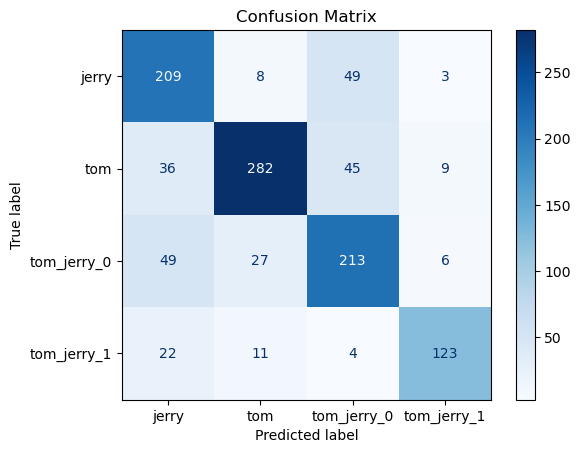

In [13]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
#parameteres for prepruning
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth' : [5,10,15,20,25,30,35,45,55,65,75],
    'max_features' : ['sqrt', 'log2']
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
dt = DecisionTreeClassifier()
cv = GridSearchCV(dt, param_grid = params, cv = 5, scoring = 'accuracy')

In [18]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35, 45, 55, 65,
                                       75],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [19]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [20]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth = 25, max_features= 'sqrt', splitter= 'random')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, max_features='sqrt', splitter='random')

[Text(0.5468889072309548, 0.9807692307692307, 'x[2021] <= 0.459\ngini = 0.725\nsamples = 4382\nvalue = [971, 1558, 1233, 620]'),
 Text(0.26180200305120876, 0.9423076923076923, 'x[6792] <= 0.921\ngini = 0.741\nsamples = 1796\nvalue = [484, 538, 469, 305]'),
 Text(0.1850187772324775, 0.9038461538461539, 'x[6616] <= 0.39\ngini = 0.741\nsamples = 1759\nvalue = [459, 538, 457, 305]'),
 Text(0.10932065217391304, 0.8653846153846154, 'x[2007] <= 0.047\ngini = 0.734\nsamples = 766\nvalue = [252, 214, 122, 178]'),
 Text(0.06979572713643178, 0.8269230769230769, 'x[9744] <= 0.438\ngini = 0.724\nsamples = 564\nvalue = [218, 113, 101, 132]'),
 Text(0.03814467766116941, 0.7884615384615384, 'x[8118] <= 0.052\ngini = 0.656\nsamples = 295\nvalue = [148, 55, 66, 26]'),
 Text(0.02871064467766117, 0.75, 'x[9136] <= 0.044\ngini = 0.117\nsamples = 16\nvalue = [1, 0, 15, 0]'),
 Text(0.02775112443778111, 0.7115384615384616, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0]'),
 Text(0.02967016491754123, 0.711538

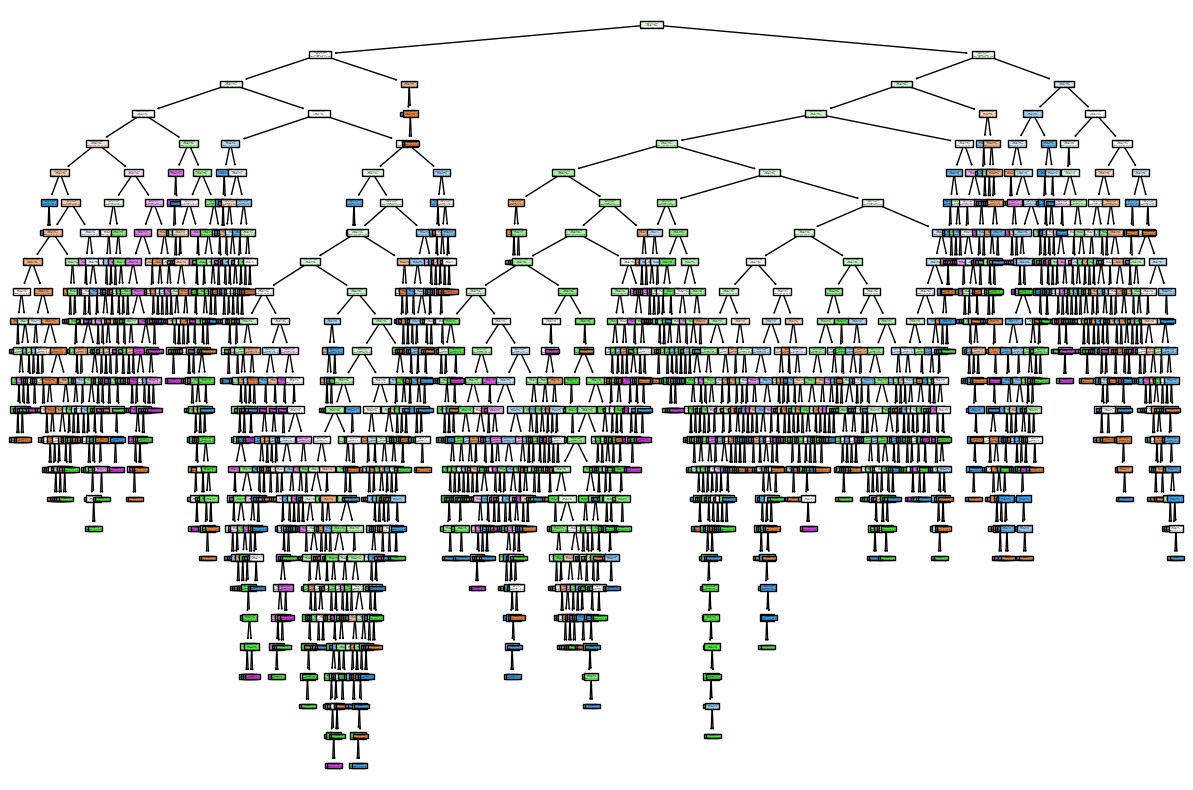

In [21]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled = True)

In [22]:
y_pred2 = dt.predict(X_test)

In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred2))
print("Accuracy:", accuracy_score(y_test, y_pred2))

Classification Report:
              precision    recall  f1-score   support

       jerry       0.66      0.65      0.65       269
         tom       0.72      0.66      0.69       372
 tom_jerry_0       0.64      0.68      0.66       295
 tom_jerry_1       0.60      0.64      0.62       160

    accuracy                           0.66      1096
   macro avg       0.65      0.66      0.66      1096
weighted avg       0.66      0.66      0.66      1096

Accuracy: 0.6624087591240876


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [26]:
y_pred3 = rf.predict(X_test)

In [27]:
print("Classification Report:")
print(classification_report(y_test, y_pred3))
print("Accuracy:", accuracy_score(y_test, y_pred3))

Classification Report:
              precision    recall  f1-score   support

       jerry       0.83      0.76      0.79       269
         tom       0.79      0.89      0.84       372
 tom_jerry_0       0.74      0.73      0.73       295
 tom_jerry_1       0.87      0.77      0.81       160

    accuracy                           0.80      1096
   macro avg       0.81      0.79      0.80      1096
weighted avg       0.80      0.80      0.80      1096

Accuracy: 0.7974452554744526


## SVM

In [28]:
from sklearn import svm

In [29]:
svm_classifier = svm.SVC(kernel='linear', C=1.0)

In [30]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
y_pred4 = svm_classifier.predict(X_test)

In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred4))
print("Accuracy:", accuracy_score(y_test, y_pred4))

Classification Report:
              precision    recall  f1-score   support

       jerry       0.62      0.70      0.65       269
         tom       0.72      0.69      0.71       372
 tom_jerry_0       0.60      0.62      0.61       295
 tom_jerry_1       0.81      0.68      0.74       160

    accuracy                           0.67      1096
   macro avg       0.69      0.67      0.68      1096
weighted avg       0.68      0.67      0.67      1096

Accuracy: 0.6715328467153284
